In [157]:
import os 
import glob
import re
import yaml
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

ROOT = os.path.abspath("../YOLO5")
yolo_path = os.path.join(ROOT, "yolov5-master")
image_path = os.path.join(ROOT, "test0630/images")

In [146]:
# Use Trained YOLOv5 Model to screen through the image
!python ../YOLO5/yolov5-master/detect.py --source ../YOLO5/Invoice/test/images/X51005433522.jpg \
--weights ../YOLO5/yolov5-master/runs/train/exp6/weights/best.pt \
--conf-thres 0.5 \
--max-det 3 \
--save-txt

detect: weights=['../YOLO5/yolov5-master/runs/train/exp6/weights/best.pt'], source=../YOLO5/Invoice/test/images/X51005433522.jpg, data=../YOLO5/yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=3, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../YOLO5/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.12.0 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/1 /Users/huihancai/Documents/Capstone/YOLO5/Invoice/test/images/X51005433522.jpg: 640x480 1 Table, Done. (0.149s)
Speed: 0.8ms pre-process, 148.5ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../YOLO5/yolov5-master/runs/detect/exp20
1 labels saved to ../YOLO5/yolov5-master/

In [147]:
# Find the latest detection results
detect_path = os.path.join(yolo_path, 'runs/detect')
detect_path

'/Users/huihancai/Documents/Capstone/YOLO5/yolov5-master/runs/detect'

In [148]:
latest_result = max([os.path.join(detect_path, d) for d in os.listdir(detect_path) if d[:3]=='exp'], key=os.path.getctime)
predicted_labels_path = os.path.join(latest_result, 'labels')
predicted_labels_path

'/Users/huihancai/Documents/Capstone/YOLO5/yolov5-master/runs/detect/exp20/labels'

In [149]:
# Get a list of classes used
with open(os.path.join(ROOT,'Invoice/data.yaml')) as file:
    array_of_yolo_classes = yaml.load(file, Loader=yaml.FullLoader)['names']
    print(array_of_yolo_classes)

['Table']


In [104]:
def is_number(n):
    try:
        float(n)
        return True
    except ValueError:
        return False

In [150]:
for each_yolo_file in os.listdir(predicted_labels_path):
    if each_yolo_file.endswith("txt"):
        the_file = open(os.path.join(predicted_labels_path,each_yolo_file),'r')
        all_lines = the_file.readlines()
        image_name = each_yolo_file
    
        # Check if there is an image matching the file
        if os.path.exists(os.path.join(image_path, each_yolo_file.replace('txt', 'jpg'))):
            image_name = each_yolo_file.replace('txt', 'jpg')
        
        if not image_name == each_yolo_file:
            # If the image name is the same as the yolo filename
            # then we did NOT find an image that matches, and we will skip this code block
            orig_img = Image.open(os.path.join(image_path,image_name)) # open the image
            image_width = orig_img.width
            image_height = orig_img.height
            
            for each_line in all_lines:
                # read yolo file line by line
                yolo_array = re.split("\s", each_line.rstrip()) # remove any extra space from the end of the line

                # initalize the variables
                class_number = 0
                x_yolo = 0.0
                y_yolo = 0.0
                yolo_width = 0.0
                yolo_height = 0.0
                yolo_array_contains_only_digits = True

                # make sure the array has the correct number of items
                if len(yolo_array) == 5:
                    for each_value in yolo_array:
                        # If a value is not a number, then the format is not correct, return false
                        if not is_number(each_value):
                            yolo_array_contains_only_digits = False

                    if yolo_array_contains_only_digits:
                        # assign the variables
                        class_number = int(yolo_array[0])
                        object_name = array_of_yolo_classes[class_number]
                        x_yolo = float(yolo_array[1])
                        y_yolo = float(yolo_array[2])
                        yolo_width = float(yolo_array[3])
                        yolo_height = float(yolo_array[4])

                        # Convert Yolo Format to Bounding Box format
                        box_width = yolo_width * image_width
                        box_height = yolo_height * image_height
                        x_min = int(x_yolo * image_width - (box_width / 2))
                        y_min = int(y_yolo * image_height - (box_height / 2))
                        x_max = int(x_yolo * image_width + (box_width / 2))
                        y_max = int(y_yolo * image_height + (box_height / 2))
                        
                        # Use tesseract to extract the text from the bounding box
                        
                        

In [151]:
image_name, object_name, x_min, y_min, x_max, y_max

('X51005433522.jpg', 'Table', 315, 468, 643, 769)

In [166]:
# Obtain the region of interest
orig_img_arr = np.asarray(orig_img)
ROI = orig_img_arr[y_min:y_max, x_min:x_max]

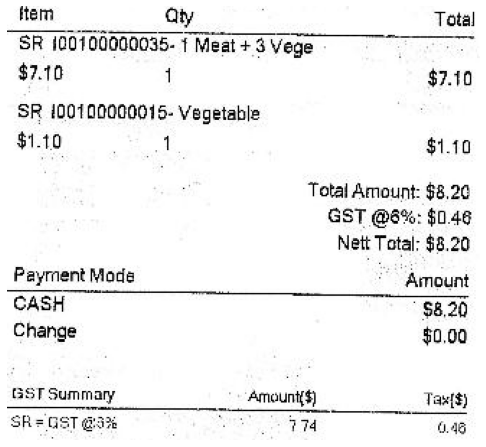

In [153]:
def display(im_data):
    dpi = 50

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
display(ROI)

In [184]:
import pytesseract
from pytesseract import Output

ocr_result = pytesseract.image_to_string(ROI) #line by line
print(ocr_result)

itachi ay Total

‘SR 100700000035. 1 Meat +3 Vege

$7.10 1 $7.10
SR 100100000015- Vegetable
$1.10 1 $1.10

Total Amount: $8.26

GST @a%:
Nett Total: $8.20
Payment Mode ‘Amount
ASH $8.25
Change $0.00
ST Summary __-Amount{s) Tels)

SRT OSTeIe 174 0.48

